### Import necessary Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

###  Distribution of attack type in the first file

Files used: [0]


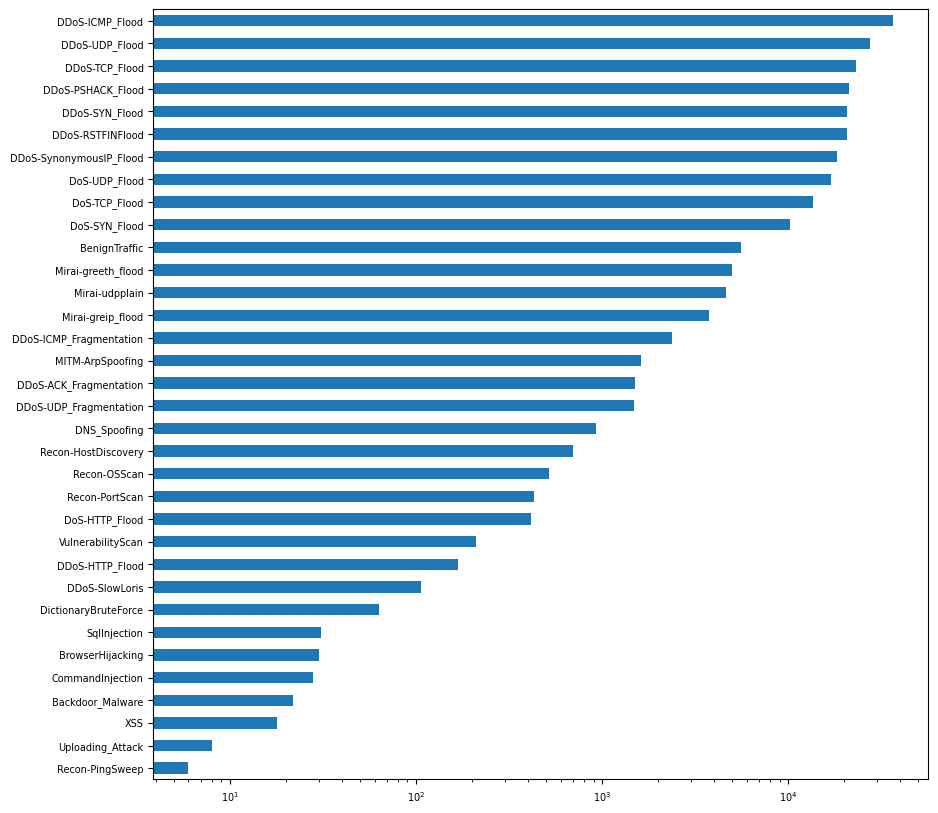

In [3]:
data_path = '/kaggle/input/cic-iot-2023/CIC IoT 2023/'

Files = [0]
print(f'Files used: {Files}')

# Plot each file separately
for file in Files:
    df = pd.read_csv(data_path + f'part-{file:05d}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')
    plt.figure(figsize=(10, 10))
    df['label'].value_counts(ascending=True).plot(kind='barh', logx=True)
    plt.tick_params(axis='both', which='major', labelsize=7)  # Set tick label font size
    plt.show()


### Balance data

In [4]:
# Get all data from first 20 file
data_path = '/kaggle/input/cic-iot-2023/CIC IoT 2023/'
dfs = []
for i in range(0, 20):
    train_file = f'part-{i:05d}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
    print(train_file)
    dfs.append(pd.read_csv(data_path + train_file))

df = pd.concat(dfs, ignore_index=True)

part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00016-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00017-363d1ba3-8ab5-4f96-b

In [5]:
# Display the original class distribution
print(df['label'].value_counts(ascending=True))

Uploading_Attack              126
Recon-PingSweep               197
Backdoor_Malware              359
XSS                           375
CommandInjection              497
SqlInjection                  550
BrowserHijacking              564
DictionaryBruteForce         1285
DDoS-SlowLoris               2401
DDoS-HTTP_Flood              2894
VulnerabilityScan            3804
DoS-HTTP_Flood               7304
Recon-PortScan               8242
Recon-OSScan                10028
Recon-HostDiscovery         13584
DNS_Spoofing                18269
DDoS-ACK_Fragmentation      28946
DDoS-UDP_Fragmentation      29312
MITM-ArpSpoofing            31175
DDoS-ICMP_Fragmentation     45709
Mirai-greip_flood           76356
Mirai-udpplain              90310
Mirai-greeth_flood          99640
BenignTraffic              111208
DoS-SYN_Flood              204010
DoS-TCP_Flood              270249
DoS-UDP_Flood              336005
DDoS-SynonymousIP_Flood    363311
DDoS-RSTFINFlood           408875
DDoS-SYN_Flood

#### Convert attack label to attack category

In [6]:
def convert_to_category(dataframe):
    category = {'DDoS-ICMP_Flood': 'DDos', 'DDoS-RSTFINFlood': 'DDos', 'DDoS-SYN_Flood': 'DDos', 'DDoS-SynonymousIP_Flood': 'DDos', 'DDoS-UDP_Flood': 'DDos', 'DDoS-PSHACK_Flood': 'DDos', 'DDoS-UDP_Fragmentation': 'DDos', 'DDoS-TCP_Flood': 'DDos', 'DDoS-ICMP_Fragmentation': 'DDos', 'DDoS-HTTP_Flood': 'DDos', 'DDoS-ACK_Fragmentation': 'DDos', 'DDoS-SlowLoris': 'DDos', 'DoS-UDP_Flood': 'Dos', 'DoS-TCP_Flood': 'Dos', 'DoS-SYN_Flood': 'Dos', 'DoS-HTTP_Flood': 'Dos', 'Recon-HostDiscovery': 'Recon', 'Recon-PortScan': 'Recon', 'Recon-OSScan': 'Recon', 'Recon-PingSweep': 'Recon', 'VulnerabilityScan': 'Recon', 'Uploading_Attack': 'Recon', 'SqlInjection': 'Web-based', 'CommandInjection': 'Web-based', 'Backdoor_Malware': 'Web-based', 'XSS': 'Web-based', 'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing', 'BrowserHijacking': 'Spoofing', 'DictionaryBruteForce': 'Bruteforce', 'Mirai-greeth_flood': 'Mirai', 'Mirai-udpplain': 'Mirai', 'Mirai-greip_flood': 'Mirai', 'BenignTraffic': 'Benign'}


    dataframe['category'] = dataframe['label'].map(category)

    print(dataframe['category'].value_counts(ascending=True))

    dataframe.drop("label" ,axis=1, inplace=True)
    
    return dataframe

In [7]:
df = convert_to_category(df)

Bruteforce       1285
Web-based        1781
Recon           35981
Spoofing        50008
Benign         111208
Mirai          266306
Dos            817568
DDos          3439685
Name: category, dtype: int64


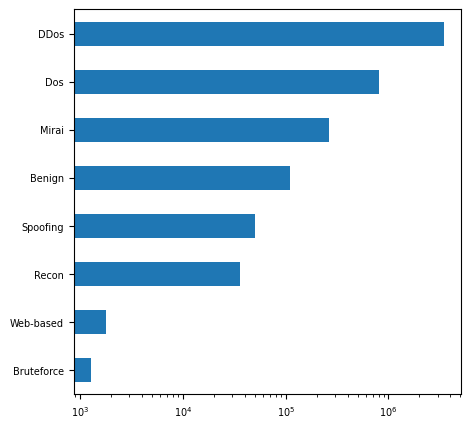

In [8]:
plt.figure(figsize=(5, 5))
df['category'].value_counts(ascending=True).plot(kind='barh', logx=True)
plt.tick_params(axis='both', which='major', labelsize=7)  # Set tick label font size
plt.show()

#### Undersampling the data 


In [9]:
def undersampling_df(dataframe):
    # Separate features and category
    X = dataframe.drop('category', axis=1)
    y = dataframe['category']

    # Resample the data using RandomUnderSampler
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Create a new DataFrame with balanced data
    balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

    # Display the balanced class distribution
    print(balanced_df['category'].value_counts(ascending=True))
    
    return balanced_df

In [10]:
balanced_df = undersampling_df(df)

Benign        1285
Bruteforce    1285
DDos          1285
Dos           1285
Mirai         1285
Recon         1285
Spoofing      1285
Web-based     1285
Name: category, dtype: int64


In [11]:
print(len(balanced_df))

10280


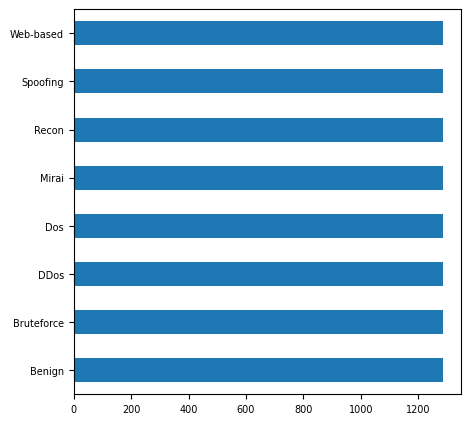

In [12]:
plt.figure(figsize=(5, 5))
balanced_df['category'].value_counts(ascending=True).plot(kind='barh')
plt.tick_params(axis='both', which='major', labelsize=7)  # Set tick label font size
plt.show()

### Data cleaning

In [ ]:
# Drop high_corr_cols
high_corr_cols = ['Srate', 'rst_flag_number', 'ack_count', 'LLC', 'Std', 'Radius', 'Magnitue', 'Number', 'Weight'] # Can be found at high-corr-cols-find notbook

balanced_df.drop(high_corr_cols,axis=1, inplace=True)

In [ ]:
num_rows_with_missing_values = balanced_df.isin([np.nan, np.inf, -np.inf]).any(axis=1).sum()

print(num_rows_with_missing_values)

In [ ]:
# remove nan, inf, -inf value
balanced_df = balanced_df[~balanced_df.isin([np.nan, np.inf, -np.inf]).any(axis=1)] 

### Export csv file

In [13]:
balanced_df.to_csv('balanced.csv', index=False)